In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [3]:
X = []
Y = []
with open('data_1d.csv') as f:
    line_list = f.read().splitlines()
    for line in line_list:
        info = line.split(',')
        X.append(float(info[0]))
        Y.append(float(info[1]))

X = np.array(X)
Y = np.array(Y)

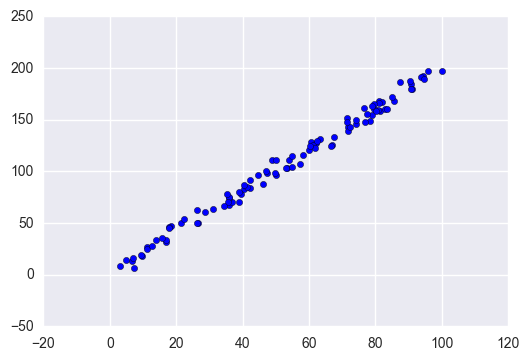

In [4]:
plt.scatter(X, Y)

#### Dot Product: $$a^Tb = \sum_{i=1}^{N}{a_ib_i}$$
#### Numpy:
`a.dot(b)`

In [5]:
common_denominator = np.dot(X, X) - np.mean(X) * np.sum(X)
A_numerator = np.dot(X, Y) - np.mean(Y) * np.sum(X)
B_numerator = np.mean(Y) * np.dot(X, X) - np.mean(X) * np.dot(X, Y)
A = np.divide(A_numerator, common_denominator)
B = np.divide(B_numerator, common_denominator)

R^2: 0.991183820298


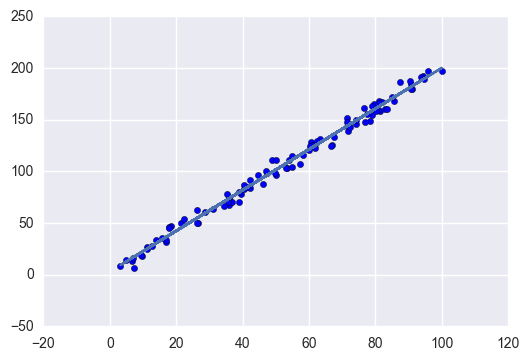

In [6]:
Y_hat = A * X + B

plt.scatter(X, Y)
plt.plot(X, Y_hat)
residual_squared_sum = np.sum(np.square(Y - Y_hat))
total_squared_sum = np.sum(np.square(Y - np.mean(Y)))
R_squared_score = 1 - (residual_squared_sum / total_squared_sum)
print('R^2: {}'.format(R_squared_score))

In [7]:
import re

non_decimal = re.compile(r'[^\d]+')
X = []
Y = []

# Moore's law example
with open('moore.csv') as f:
    lines = f.read().split('\n')
    for line in lines:
        info = line.split('\t')
        year = int(non_decimal.sub('', info[2].split('[')[0]))
        count = int(non_decimal.sub('', info[1].split('[')[0]))
        X.append(year)
        Y.append(count)
        
X = np.array(X)
Y = np.array(Y)
Y = np.log(Y)

In [8]:
common_denominator = np.dot(X, X) - np.mean(X) * np.sum(X)
A_numerator = np.dot(X, Y) - np.mean(Y) * np.sum(X)
B_numerator = np.mean(Y) * np.dot(X, X) - np.mean(X) * np.dot(X, Y)
A = np.divide(A_numerator, common_denominator)
B = np.divide(B_numerator, common_denominator)

R^2: 0.952944285229


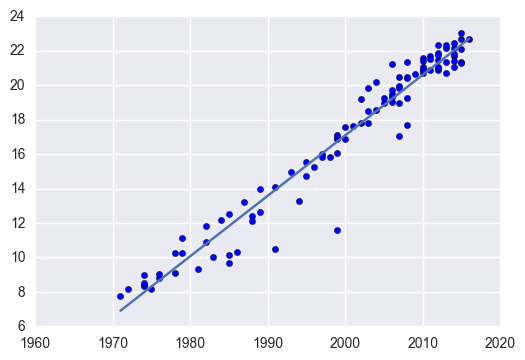

In [9]:
Y_hat = A * X + B

plt.scatter(X, Y)
plt.plot(X, Y_hat)
residual_squared_sum = np.sum(np.square(Y - Y_hat))
total_squared_sum = np.sum(np.square(Y - np.mean(Y)))
R_squared_score = 1 - (residual_squared_sum / total_squared_sum)
print('R^2: {}'.format(R_squared_score))

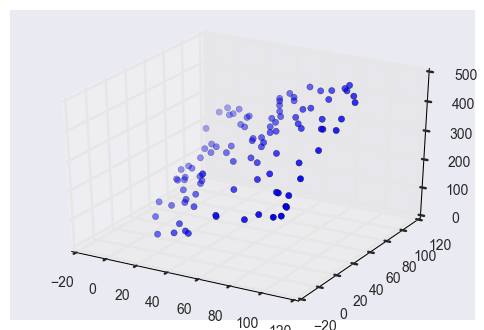

In [10]:
# 3-dimensional linear regression

X = []
Y = []

for line in open('data_2d.csv'):
    x1, x2, y = map(float, line.split(','))
    X.append([x1, x2, 1])
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

#### Linear System Solve: $$Ax=b$$
#### $$A = X^{T}X$$
#### $$b = X^{T}Y$$

#### $$A^{-1}(Ax) = A^{-1}B$$
#### $$ (A^{-1}A)x = A^{-1}B$$
#### $$Ix = A^{-1}B$$ where I is the identity matrix
#### $$x = A^{-1}B$$
#### $$x = ({X^{T}X})^{-1}X^{T}Y$$


#### In numpy, we can just simply called $$np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))$$

In [11]:
weight = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Y_hat = np.dot(X, weight)

# Compute R^2
residual_squared_sum = np.sum(np.square(Y - Y_hat))
total_squared_sum = np.sum(np.square(Y - np.mean(Y)))
R_squared_score = 1 - (residual_squared_sum / total_squared_sum)
print("R^2: {}".format(R_squared_score))

R^2: 0.998004061248


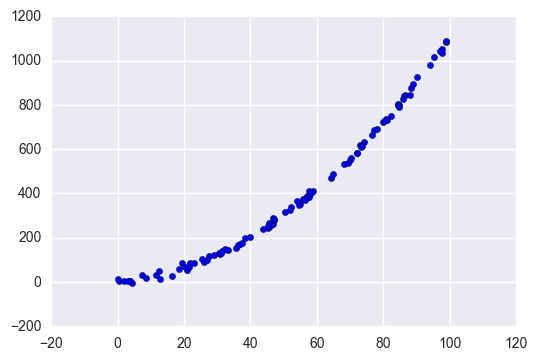

In [12]:
# Non-linear regression
X = []
Y = []

for line in open('data_poly.csv'):
    x, y = map(float, line.split(','))
    X.append([x, x ** 2, 1])
    Y.append(y)

X = np.array(X)
Y = np.array(Y)

plt.scatter(X[:,0], Y)

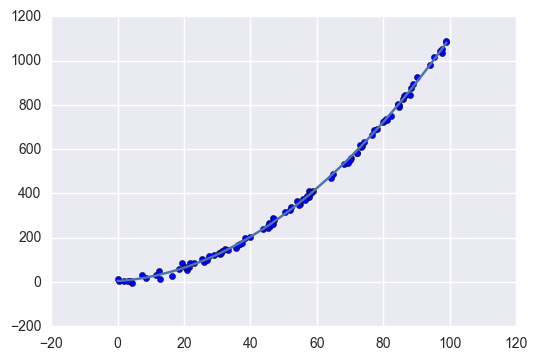

In [13]:
weight = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Y_hat = np.dot(X, weight)

plt.scatter(X[:,0], Y)
plt.plot(sorted(X[:,0]), sorted(Y_hat))

In [14]:
# Compute R^2
residual_squared_sum = np.sum(np.square(Y - Y_hat))
total_squared_sum = np.sum(np.square(Y - np.mean(Y)))
R_squared_score = 1 - (residual_squared_sum / total_squared_sum)
print("R^2: {}".format(R_squared_score))

R^2: 0.999141229637


In [15]:
# Predict blood pressure

df = pd.read_excel('mlr02.xls')
X = df.as_matrix()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


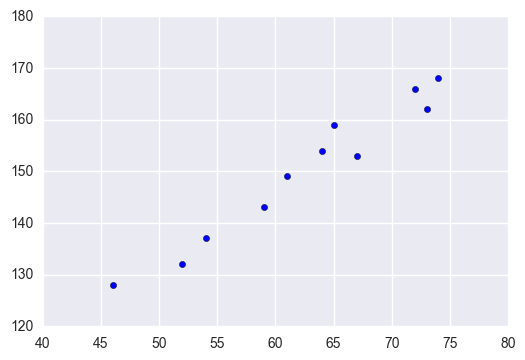

In [16]:
plt.scatter(X[:,1], X[:,0])

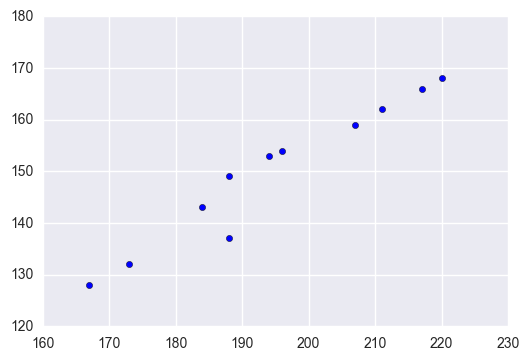

In [17]:
plt.scatter(X[:,2], X[:,0])

In [18]:
def get_rsquared(X, Y):
    weights = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
    Y_hat = X.dot(weights)
    residual_squared_sum = np.sum(np.square(Y - Y_hat))
    total_squared_sum = np.sum(np.square(Y - np.mean(Y)))
    R_squared_score = 1 - (residual_squared_sum / total_squared_sum)
    return R_squared_score

In [19]:
df['bias'] = 1
X = df[['X2', 'X3', 'bias']]
Y = df['X1']
X2_only = df[['X2', 'bias']]
X3_only = df[['X3', 'bias']]

print('R^2 for x2 only: {}'.format(get_rsquared(X2_only, Y)))
print('R^2 for x3 only: {}'.format(get_rsquared(X3_only, Y)))
print('R^2 for both: {}'.format(get_rsquared(X, Y)))

R^2 for x2 only: 0.957840720815
R^2 for x3 only: 0.941995208529
R^2 for both: 0.97684710415


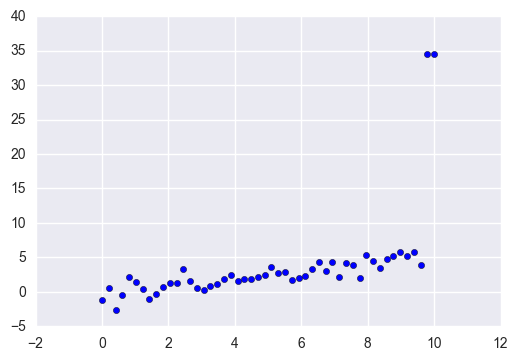

In [35]:
# Ridge regression
N = 50
X = np.linspace(0, 10, N)
Y = 0.5 * X + np.random.randn(N)

Y[-1] += 30
Y[-2] += 30

plt.scatter(X, Y)

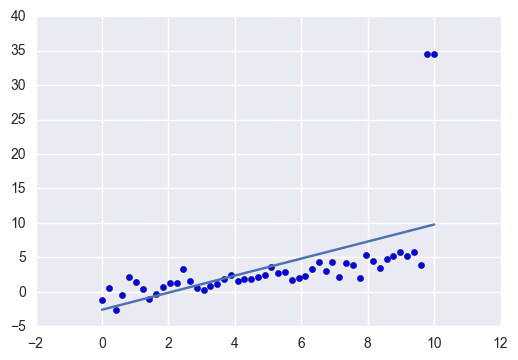

In [36]:
X = np.vstack([np.ones(N), X]).T

W_ml = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Y_hat_ml = X.dot(W_ml)
plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], Y_hat_ml)

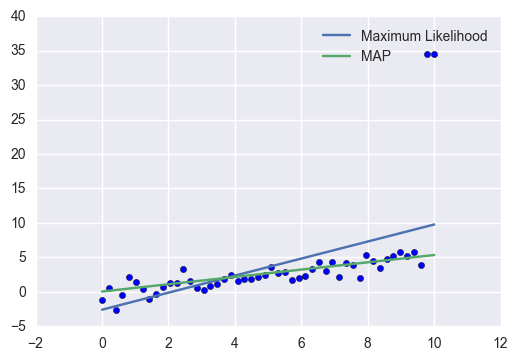

In [37]:
l2 = 1000.0
W_map = np.linalg.solve(l2 * np.eye(2) + X.T.dot(X), X.T.dot(Y))
Y_hat_map = X.dot(W_map)
plt.scatter(X[:, 1], Y)
plt.plot(X[:, 1], Y_hat_ml, label='Maximum Likelihood')
plt.plot(X[:, 1], Y_hat_map, label='MAP')
plt.legend()

### Gradient Descent

In [125]:
N = 10
D = 3

X = np.zeros((N,D))
X[:, 0] = 1
X[:5, 1] = 1
X[5:, 2] = 1

Y = np.array([0] * 5 + [1] * 5)

# Standard linear solver won't work
weights = np.linalg.solve(X.T.solve(X), X.T.dot(Y))

AttributeError: 'numpy.ndarray' object has no attribute 'solve'

### Notes on batch gradient descent
- The cost function for linear regression would be something like $$J(\beta) = \frac{1}{2m} \sum_{i=1}^{m}(h(x)^{(i)} - y^{(i)})^{2}$$ where $h(x)$ is the hypothesis function aka our model and $h(x)^{(i)} - y^{(i)}$ is really just the delta (prediction - label)
- Our hypothesis function would simply be the standard algebra 1 equation. $y = mx + b$ or $h(x) = \beta_{0} + \beta_{1}x_{1}$
- For each weight in the weight vector, we will go ahead and use learning rate and multiply that by average of the sum of the derivative of the cost function from 1 to m, and the equation would be something like $$B_j = B_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h(x^{(i)}) - y^{(i)})x^{(i)}_{j}$$
- We simply use numpy to simplify the process by a lot with the abstraction of vectors/arrays so we don't have to do updates individually but rather in the view of vector multiplication
- At times, we want to actually play with the learning rate. If the learning rate is too high, we will be moving too fast and skipping the minimum/maximum that we want to go for. If the learning rate is too low, then it will just take a long time to converge

#### Pretty good tutorial on gradient descent
#### http://www.ozzieliu.com/tutorials/Linear-Regression-Gradient-Descent.html

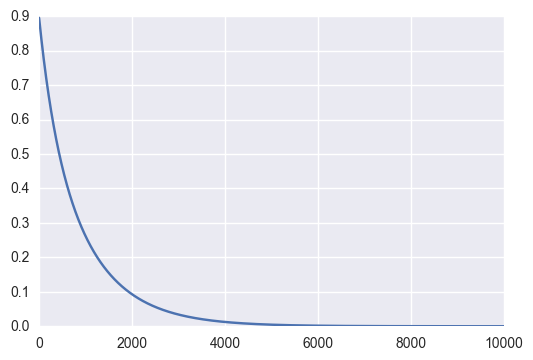

In [126]:
costs = []
weights = np.random.randn(D) / np.sqrt(D)
learning_rate = 0.001
epochs = 10000

for _ in range(epochs):
    prediction = X.dot(weights)
    delta = prediction - Y
    gradient = X.T.dot(delta)
    weights = weights - learning_rate * gradient / N
    # delta.dot(delta) = delta^2
    mean_squared_error = delta.dot(delta) / N
    costs.append(mean_squared_error)
    
plt.plot(costs)

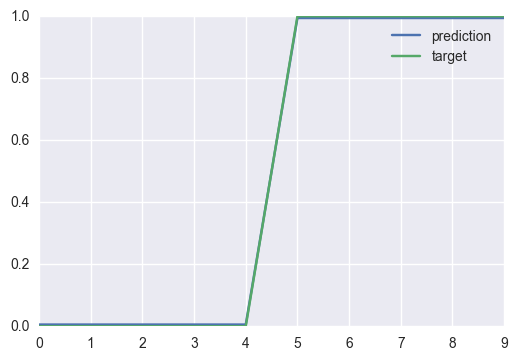

In [127]:
plt.plot(prediction, label='prediction')
plt.plot(Y, label='target')
plt.legend()

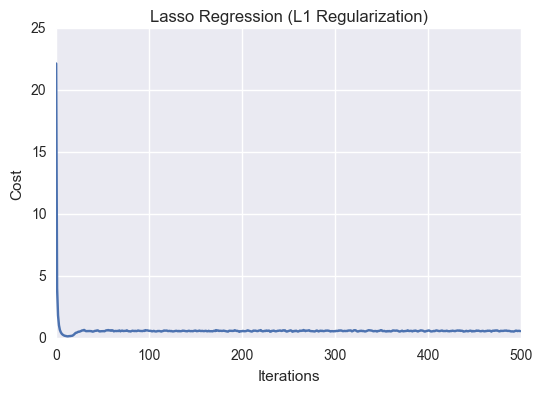

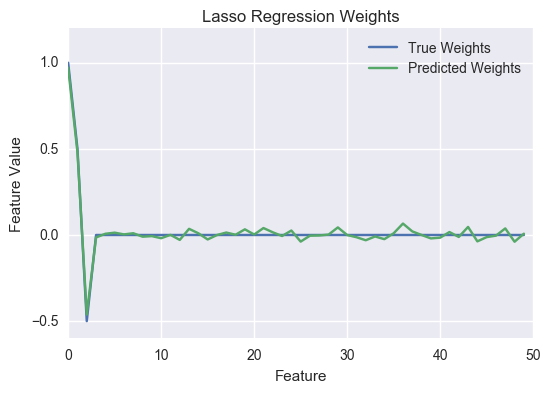

In [135]:
# Lasso Regression (L1)
N = 50
D = 50

X = (np.random.random((N, D)) - 0.5) * 10
true_weights = np.array([1, 0.5, -0.5] + [0] * (D - 3))
Y = X.dot(true_weights) + np.random.randn(N) * 0.5

costs = []
weights = np.random.randn(D) / np.sqrt(D)
learning_rate = 0.001
l1 = 10.0
epochs = 500

for _ in range(epochs):
    prediction = X.dot(weights)
    delta = prediction - Y
    gradient = X.T.dot(delta)
    regularization = l1 * np.sign(weights)
    weights = weights - learning_rate * (gradient + regularization)
    mean_squared_error = delta.dot(delta) / N
    costs.append(mean_squared_error)
    
plt.plot(costs)
plt.title('Lasso Regression (L1 Regularization)')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

plt.plot(true_weights, label='True Weights')
plt.plot(weights, label='Predicted Weights')
plt.title('Lasso Regression Weights')
plt.ylabel('Feature Value')
plt.xlabel('Feature')
plt.legend()

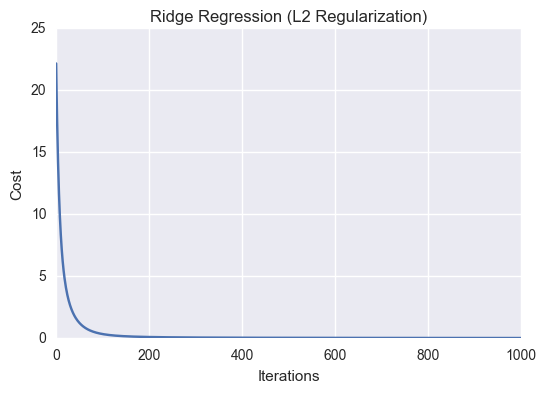

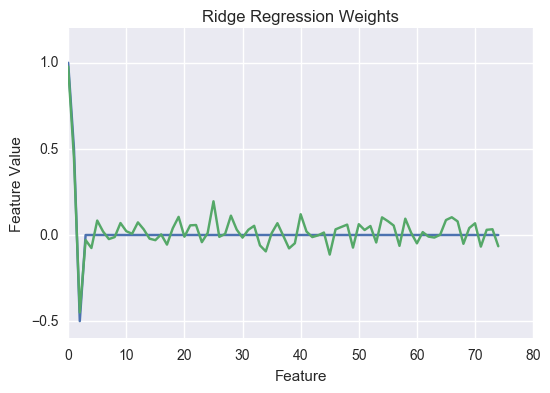

In [153]:
# Ridge Regression (L2)

N = 75
D = 75

X = (np.random.random((N, D)) - 0.5) * 10
true_weights = np.array([1, 0.5, -0.5] + [0] * (D - 3))
Y = X.dot(true_weights) + np.random.randn(N) * 0.5

costs = []
epochs = 1000
learning_rate = 0.00005
l2 = 10.0
weights = np.random.randn(D) / np.sqrt(D)

for _ in range(epochs):
    prediction = X.dot(weights)
    delta = prediction - Y
    gradient = X.T.dot(delta)
    l2_regularization = l2 / N * weights
    weights = weights - learning_rate * (gradient + l2_regularization)
    mean_squared_error = delta.dot(delta) / N
    costs.append(mean_squared_error)

plt.plot(costs)
plt.title('Ridge Regression (L2 Regularization)')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

plt.plot(true_weights, label='True Weights')
plt.plot(weights, label='Predicted Weights')
plt.title('Ridge Regression Weights')
plt.ylabel('Feature Value')
plt.xlabel('Feature')

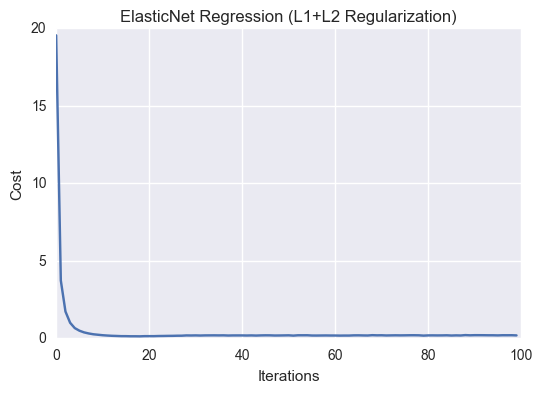

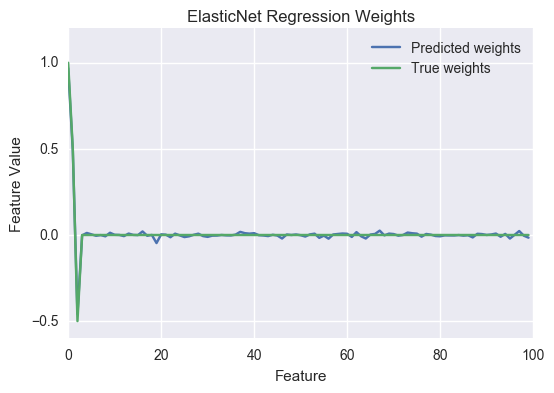

In [154]:
# ElasticNet (L1 + L2)

N = 100
D = 100

X = (np.random.random((N, D)) - 0.5) * 10
true_weights = np.array([1, 0.5, -0.5] + [0] * (D - 3))
Y = X.dot(true_weights) + np.random.randn(N) * 0.5

costs = []
epochs = 100
learning_rate = 0.00051
l1 = 10.0
l2 = 30.0
weights = np.random.randn(D) / np.sqrt(D)

for _ in range(epochs):
    prediction = X.dot(weights)
    delta = prediction - Y
    gradient = X.T.dot(delta)
    l1_regularization = l1 * np.sign(weights)
    l2_regularization = l2 / N * weights
    weights = weights - learning_rate * (gradient + l1_regularization + l2_regularization)
    mean_squared_error = delta.dot(delta) / N
    costs.append(mean_squared_error)
    
plt.plot(costs)
plt.title('ElasticNet Regression (L1+L2 Regularization)')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.show()

plt.plot(weights, label='Predicted weights')
plt.plot(true_weights, label='True weights')
plt.legend()
plt.title('ElasticNet Regression Weights')
plt.ylabel('Feature Value')
plt.xlabel('Feature')